https://leetcode.com/problems/kth-smallest-element-in-a-bst/description/

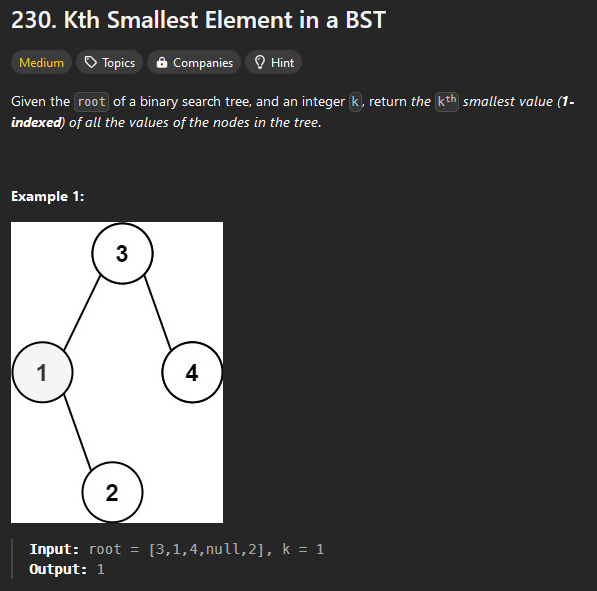

In [ ]:
class Node:
    def __init__(self, val, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right


def list_to_bin_tree(l):
    if not l:
        return None

    root = Node(l.pop(0))
    queue = [root]

    while queue:
        node = queue.pop(0)

        if l:
            left_val = l.pop(0)
            if left_val != None:
                node.left = Node(left_val)
                queue.append(node.left)

        if l:
            right_val = l.pop(0)
            if right_val != None:
                node.right = Node(right_val)
                queue.append(node.right)

    return root



'''
Iterative approach using a stack, since we need to search for the k smallest we need 
to traverse the left subtree until a leaf node
'''
def solution(root, k):
    # create a stack to hold nodes 
    stack = []
    # establish node ptr at root
    ptr = root
    # init counter to count up to k
    counter = 0
    
    # while ptr != None or stack is not empty
    while ptr or stack:
        
        # while ptr != None push all the left nodes onto the stack, 
        # and traverse to last node on left
        while ptr:            
            stack.append(ptr)
            ptr = ptr.left
            
        # Once we’ve reached the leftmost node (or if there's no left node), 
        # we pop the top of the stack. This will be the last node added
        curr_node = stack.pop()
        # We increment the counter to indicate that we have visited one more node
        counter += 1
        
        
        # If the counter equals k, we know that the 
        # current node is the k-th smallest element. 
        # Therefore, we return its value
        if counter == k:
            return curr_node.val
        
        # After visiting the current node, 
        # we move to its right subtree by assigning ptr to curr_node.right.
        # The right subtree will be processed in 
        # subsequent iterations of the main loop 
        # (i.e., the next smallest element will come 
        # from this right subtree if it exists)
        ptr = curr_node.right
    
    # If the tree has fewer than k elements, 
    # and the loop ends without finding the k-th smallest element, 
    # the function returns None
    return None
        


def test_solution():

    tests = [
        {"input": {"root": None, "val": 1}, "output": [1]},
        {"input": {"root": [2], "val": 1}, "output": [2, 1]},
        {"input": {"root": [4, 2, 7, 1, 3], "val": 5}, "output": [4, 2, 7, 1, 3, 5]},
    ]

    for i in range(len(tests)):
        print(
            "Test",
            i + 1,
            "Pass:",
            solution(
                list_to_bin_tree(tests[i]["input"]["root"]), tests[i]["input"]["val"]
            )
            == tests[i]["output"],
        )

Recursive Solution

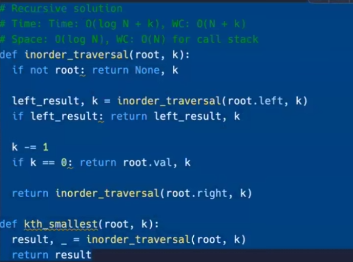